## Quantitative text analysis using R quanteda and tidytext packages
- Read a corpus of text
- Tokenise the text
- Find patterns
- Create word clouds
- Sentiment analysis
- Extend the analyses to Twitter for sentiment analyses

## Readtext
- Read text from file
- Returns data frame
- This data frame can be used with corpus() function
- corpus() creates quanteda corpus object
- works on txt, csv, xml, json (twitter, facebook, generic)

## corpus()
- vector of character objects c("x", "y", "z")
- VCorpus object from tm package
- data.frame with text column and other meta-data

## Read text data into R
- [Read PDFs into R](https://www.r-bloggers.com/how-to-extract-data-from-a-pdf-file-with-r/)

## Sample twitter json
[](https://gist.githubusercontent.com/hrp/900964/raw/2bbee4c296e6b54877b537144be89f19beff75f4/twitter.json)

[Internet Archive](https://archive.org/details/archiveteam-twitter-stream-2013-08)

[Link to wordstat dictionary](https://provalisresearch.com/products/content-analysis-software/wordstat-dictionary/sentiment-dictionaries/)

[link to LIWC dictionary](http://lit.eecs.umich.edu/~geoliwc/LIWC_Dictionary.htm)

[wordfish](https://sites.temple.edu/tudsc/2017/11/09/use-wordfish-for-ideological-scaling/)

[Gutenbergr](https://ropensci.org/tutorials/gutenbergr_tutorial/)

[NRC lexicon](http://sentiment.nrc.ca/lexicons-for-research/)

[NRC lexicon zip](http://sentiment.nrc.ca/lexicons-for-research/NRC-Emotion-Lexicon.zip)

[AFINN lexicon](http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010)

[AFINN zip file](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6010/zip/imm6010.zip)

[Sentiment tutorial](https://sentiment.christopherpotts.net/lexicons.html)

[Bing lexicon data set rar](http://www.cs.uic.edu/~liub/FBS/opinion-lexicon-English.rar)

In [7]:
library(quanteda)

Package version: 1.4.3
Parallel computing: 2 of 32 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: ‘quanteda’

The following object is masked from ‘jupyter:irkernel’:

    View

The following object is masked from ‘package:utils’:

    View



In [90]:
library(tidyverse)
library(tidytext)
library(readtext)

In [91]:
library(readtext)
library(tm)

Loading required package: NLP

Attaching package: ‘NLP’

The following object is masked from ‘package:ggplot2’:

    annotate


Attaching package: ‘tm’

The following objects are masked from ‘package:quanteda’:

    as.DocumentTermMatrix, stopwords



In [5]:
# build a corpus from character vector
# take texts about immigration policy from 2010 election
# manifesto of The UK

my_corpus <- corpus(data_char_ukimmig2010)


In [10]:
# structure of the corpus
str(my_corpus)

List of 4
 $ documents:'data.frame':	9 obs. of  1 variable:
  ..$ texts: chr [1:9] "IMMIGRATION: AN UNPARALLELED CRISIS WHICH ONLY THE BNP CAN SOLVE. \n\n- At current immigration and birth rates,"| __truncated__ "IMMIGRATION. \n\nThe Government believes that immigration has enriched our culture and strengthened our economy"| __truncated__ "Attract the brightest and best to our country.\n\nImmigration has enriched our nation over the years and we wan"| __truncated__ "Immigration.\n\nMigration is a fact of life.  People have always moved from one country to another, and as a pr"| __truncated__ ...
 $ metadata :List of 2
  ..$ source : chr "/home/arinbasu/quant_analysis/* on x86_64 by arinbasu"
  ..$ created: chr "Sat Aug 31 07:48:35 2019"
 $ settings :List of 12
  ..$ stopwords          : NULL
  ..$ collocations       : NULL
  ..$ dictionary         : NULL
  ..$ valuetype          : chr "glob"
  ..$ stem               : logi FALSE
  ..$ delimiter_word     : chr " "
  ..$ delimiter_senten

In [9]:
head(my_corpus$documents) # data frame of the documents to be analysed

texts                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [11]:
my_corpus$metadata # meta-data associated with this corpus

$source
[1] "/home/arinbasu/quant_analysis/* on x86_64 by arinbasu"

$created
[1] "Sat Aug 31 07:48:35 2019"

In [12]:
my_corpus$settings

Settings:
  stopwords: NULL
  collocations: NULL
  dictionary: NULL
  valuetype: [1] "glob"
  stem: [1] FALSE
  delimiter_word: [1] " "
  delimiter_sentence: [1] ".!?"
  delimiter_paragraph: [1] "\n\n"
  clean_tolower: [1] TRUE
  clean_remove_digits: [1] TRUE
  clean_remove_punct: [1] TRUE
  units: [1] "documents"

In [13]:
my_corpus$tokens # null as there are no tokens associated with

NULL

In [15]:
summary(my_corpus) # summarise the corpus object
# text: returns the first letter of the text documents
# 9 because there are 9 documents
# 4 because 4 docvars (text, types, tokens, sentences)
# Add a docvar, "party" to this corpus

docvars(my_corpus, "party") <- names(data_char_ukimmig2010)
# this will add the docvar 'party' to the document

summary(my_corpus)

Text,Types,Tokens,Sentences
<fct>,<int>,<int>,<int>
BNP,1125,3280,88
Coalition,142,260,4
Conservative,251,499,15
Greens,322,679,21
Labour,298,683,29
LibDem,251,483,14
PC,77,114,5
SNP,88,134,4
UKIP,346,723,27


Text,Types,Tokens,Sentences,party
<fct>,<int>,<int>,<int>,<chr>
BNP,1125,3280,88,BNP
Coalition,142,260,4,Coalition
Conservative,251,499,15,Conservative
Greens,322,679,21,Greens
Labour,298,683,29,Labour
LibDem,251,483,14,LibDem
PC,77,114,5,PC
SNP,88,134,4,SNP
UKIP,346,723,27,UKIP


In [17]:
# tag each document with meta-data
# such tags are attributes of the document
# use metadoc() 

metadoc(my_corpus, "lang") <- "EN"
summary(my_corpus) # won't show up
summary(my_corpus, showmeta = T) # will show up

# if I want to analyse document level variable, 
# use docvars() and then add the feature
# If I want to 'tag' as metadata, use metadoc()

In [18]:
ndoc(my_corpus) # returns the number of documents

[1] 9

In [ ]:
# Use corpus() directly if you have read documents into R
# by other means
# Otherwise, use readtext()
# Twitter json file:


In [20]:
download.file("https://quantesslondon.files.wordpress.com/2018/07/part-ii-quantess-london-summer-seminar.pdf",
             "quantess.pdf")

In [22]:
# read pdf
quantess <- readtext("quantess.pdf")
q_corpus <- corpus(quantess)

In [23]:
summary(q_corpus)

Text,Types,Tokens,Sentences
<fct>,<int>,<int>,<int>
quantess.pdf,311,658,37


In [26]:
summary(q_corpus, showmeta = T)
docvars(q_corpus) # document level meta-data

Text,Types,Tokens,Sentences
<fct>,<int>,<int>,<int>
quantess.pdf,311,658,37


quantess.pdf


## Quanteda corpus
- library of original documents (could be one, but many)
- Each document is converted to utf-8 encoded plain text file
- Each document is also stored with metadata
- Static container of text
- First extract text from corpus
- Assign to new object
- Corpus remains the original reference copy

In [30]:
# extract text with text()
quant_text <- texts(q_corpus)
# summarise texts
sum_q <- summary(q_corpus)
sum_q

Text,Types,Tokens,Sentences
<fct>,<int>,<int>,<int>
quantess.pdf,311,658,37


In [34]:
# analyse summary of corpus data

inaugural <- corpus(data_corpus_inaugural)
# take inaugural addresses and convert to corpus
# summarise the corpus
sum_inaug <- summary(inaugural)
# use the sum_inaug data frame to plot tokens against year

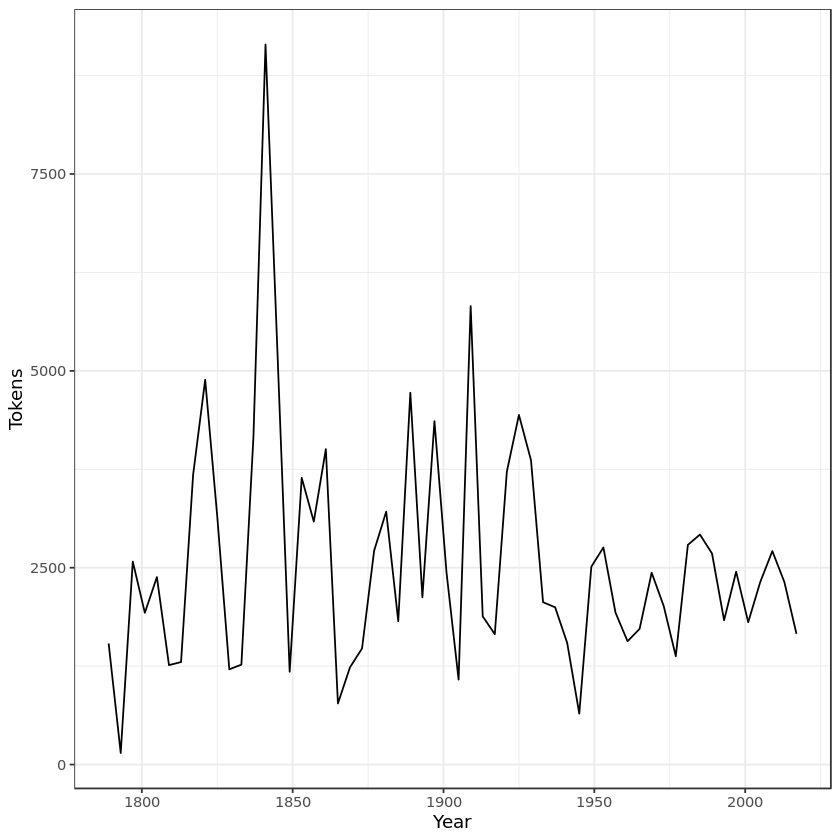

In [35]:
sum_inaug %>%
  ggplot(aes(x = Year, y = Tokens)) +
  geom_line() +
  theme_bw()

In [37]:
# you can extract other information
# e.g., who gave the longest inaugural address?
# i.e., whose speech had the largest number of tokens?

longest_address <- sum_inaug %>%
  filter(Tokens == max(Tokens, na.rm = T))
longest_address

Text,Types,Tokens,Sentences,Year,President,FirstName
<fct>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1841-Harrison,1896,9144,210,1841,Harrison,William Henry


In [41]:
# add two corpuses together using `+`
first_inaug <- corpus(inaugural[1:5])
last_inaug <- corpus(inaugural[53:58])
# add them up
combo_inaug <- first_inaug + last_inaug
summary(combo_inaug)

# Use case,
# you can take many corpuses from different documents
# and add them together

Text,Types,Tokens,Sentences
<fct>,<int>,<int>,<int>
1789-Washington,625,1538,23
1793-Washington,96,147,4
1797-Adams,826,2578,37
1801-Jefferson,717,1927,41
1805-Jefferson,804,2381,45
1997-Clinton,773,2449,111
2001-Bush,621,1808,97
2005-Bush,773,2319,100
2009-Obama,938,2711,110


In [52]:
# Subset corpus objects using corpus_subset()
# find inaugural addresses after 1990

corpus_subset(inaugural, Year > 1990) %>%
  summary() %>%
  arrange(desc(Year))


Text,Types,Tokens,Sentences,Year,President,FirstName
<fct>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
2017-Trump,582,1660,88,2017,Trump,Donald J.
2013-Obama,814,2317,88,2013,Obama,Barack
2009-Obama,938,2711,110,2009,Obama,Barack
2005-Bush,773,2319,100,2005,Bush,George W.
2001-Bush,621,1808,97,2001,Bush,George W.
1997-Clinton,773,2449,111,1997,Clinton,Bill
1993-Clinton,642,1833,81,1993,Clinton,Bill


In [53]:
# Find all speeches by Adams
corpus_subset(inaugural, President == "Adams") %>%
  summary()

Text,Types,Tokens,Sentences,Year,President,FirstName
<fct>,<int>,<int>,<int>,<dbl>,<chr>,<chr>
1797-Adams,826,2578,37,1797,Adams,John
1825-Adams,1003,3152,74,1825,Adams,John Quincy


In [56]:
# explore corpus texts
## kwic() searches for a word and views it in the context
# where the word appears
# find the word terror in the speeches

terror <- kwic(inaugural, "terror")
str(terror) # suggests it is a data frame
head(terror)

Classes ‘kwic’ and 'data.frame':	8 obs. of  7 variables:
 $ docname: chr  "1797-Adams" "1933-Roosevelt" "1941-Roosevelt" "1961-Kennedy" ...
 $ from   : int  1325 112 287 866 813 1055 1655 1632
 $ to     : int  1325 112 287 866 813 1055 1655 1632
 $ pre    : chr  "fraud or violence , by" "nameless , unreasoning , unjustified" "seemed frozen by a fatalistic" "alter that uncertain balance of" ...
 $ keyword: chr  "terror" "terror" "terror" "terror" ...
 $ post   : chr  ", intrigue , or venality" "which paralyzes needed efforts to" ", we proved that this" "that stays the hand of" ...
 $ pattern: Factor w/ 1 level "terror": 1 1 1 1 1 1 1 1
 - attr(*, "docid")= int  3 37 39 44 49 53 53 56
 - attr(*, "segid")= int  1 1 1 1 1 1 2 1
 - attr(*, "ntoken")= Named int  1538 147 2578 1927 2381 1263 1302 3680 4886 3152 ...
  ..- attr(*, "names")= chr  "1789-Washington" "1793-Washington" "1797-Adams" "1801-Jefferson" ...
 - attr(*, "types")= chr  "Fellow-Citizens" "of" "the" "Senate" ...
 - attr(*, "p

docname,from,to,pre,keyword,post,pattern
<chr>,<int>,<int>,<chr>,<chr>,<chr>,<fct>
1797-Adams,1325,1325,"fraud or violence , by",terror,", intrigue , or venality",terror
1933-Roosevelt,112,112,"nameless , unreasoning , unjustified",terror,which paralyzes needed efforts to,terror
1941-Roosevelt,287,287,seemed frozen by a fatalistic,terror,", we proved that this",terror
1961-Kennedy,866,866,alter that uncertain balance of,terror,that stays the hand of,terror
1981-Reagan,813,813,freeing all Americans from the,terror,of runaway living costs .,terror
1997-Clinton,1055,1055,They fuel the fanaticism of,terror,. And they torment the,terror


In [57]:
# Corpus level variables
docvars(inaugural) %>%
  head()

,Year,President,FirstName
,<dbl>,<chr>,<chr>
1789-Washington,1789,Washington,George
1793-Washington,1793,Washington,George
1797-Adams,1797,Adams,John
1801-Jefferson,1801,Jefferson,Thomas
1805-Jefferson,1805,Jefferson,Thomas
1809-Madison,1809,Madison,James


In [58]:
# Corpus level meta data inspect with metacorpus()
inaugural %>%
  metacorpus()

$source
[1] "Gerhard Peters and John T. Woolley. The American Presidency Project."

$notes
[1] "http://www.presidency.ucsb.edu/inaugurals.php"

$created
[1] "Tue Jun 13 14:51:47 2017"

In [ ]:
## extract features from corpus
# for statistical data analysis
# document scaling
# extract a matrix
# dfm() to extract a document feature matrix
# documents in rows, 
# features in columns
# documents are our units of analysis
# tokenize a text using tokens()
# tokenize() will work on corpus, it will not work on
# textified documents read with readtext()

q_tokens <- tokens(q_corpus)
summary(q_tokens) # summarises this object
str(q_tokens)
# list of tokens
q_tokens

In [ ]:
# Construct a document feature matrix
# use dfm()
# dfm() tokenises and then constructs a table of extracted features
# make a dfm of all post 1990 addresses

post_1990 <- corpus_subset(inaugural, Year > 1990) %>%
                dfm()
str(post_1990)
head(post_1990)

In [69]:
# extract first five features

post_1990[, 1:5]

Document-feature matrix of: 7 documents, 5 features (0.0% sparse).
7 x 5 sparse Matrix of class "dfm"
              features
docs           my fellow citizens   , today
  1993-Clinton  7      5        2 139    10
  1997-Clinton  6      7        7 131     5
  2001-Bush     3      1        9 110     2
  2005-Bush     2      3        6 120     3
  2009-Obama    2      1        1 130     6
  2013-Obama    3      3        6  99     4
  2017-Trump    1      1        4  96     4

In [72]:
# make the dfm after removing stopwords and stemming
# stemming truncates the words at the end
# remove punctuations

stop_stemmed <- corpus_subset(inaugural, Year > 1990) %>%
                  dfm(remove = stopwords("english"),
                     stem = T,
                     remove_punct = T)

In [73]:
stop_stemmed[, 1:5] # examine the five features

Document-feature matrix of: 7 documents, 5 features (17.1% sparse).
7 x 5 sparse Matrix of class "dfm"
              features
docs           fellow citizen today celebr mysteri
  1993-Clinton      5       2    10      4       1
  1997-Clinton      7       8     6      1       0
  2001-Bush         1      10     2      0       0
  2005-Bush         3       7     3      2       0
  2009-Obama        1       1     6      2       0
  2013-Obama        3       8     6      1       0
  2017-Trump        1       4     5      3       1

In [74]:
# see the list of stopwords
head(stopwords("english"), 20) # first 20 stopwords

[1] "i"          "me"         "my"         "myself"     "we"        
 [6] "our"        "ours"       "ourselves"  "you"        "your"      
[11] "yours"      "yourself"   "yourselves" "he"         "him"       
[16] "his"        "himself"    "she"        "her"        "hers"

In [77]:
summary(stop_stemmed) # provides a summary of the object
str(stop_stemmed)


Length  Class   Mode 
 12474    dfm     S4 

Formal class 'dfm' [package "quanteda"] with 15 slots
  ..@ settings    : list()
  ..@ weightTf    :List of 3
  .. ..$ scheme: chr "count"
  .. ..$ base  : NULL
  .. ..$ K     : NULL
  ..@ weightDf    :List of 5
  .. ..$ scheme   : chr "unary"
  .. ..$ base     : NULL
  .. ..$ c        : NULL
  .. ..$ smoothing: NULL
  .. ..$ threshold: NULL
  ..@ smooth      : num 0
  ..@ ngrams      : int 1
  ..@ skip        : int 0
  ..@ concatenator: chr "_"
  ..@ version     : int [1:3] 1 4 3
  ..@ docvars     :'data.frame':	7 obs. of  3 variables:
  .. ..$ Year     : num [1:7] 1993 1997 2001 2005 2009 ...
  .. ..$ President: chr [1:7] "Clinton" "Clinton" "Bush" "Bush" ...
  .. ..$ FirstName: chr [1:7] "Bill" "Bill" "George W." "George W." ...
  ..@ i           : int [1:3792] 0 1 2 3 4 5 6 0 1 2 ...
  ..@ p           : int [1:1783] 0 7 14 21 27 29 36 41 44 46 ...
  ..@ Dim         : int [1:2] 7 1782
  ..@ Dimnames    :List of 2
  .. ..$ docs    : chr [1:7] "1993-Clinton" "1997-Clinton" "2001-Bush"

ERROR: Error in stop_stemmed$settings: $ operator not defined for this S4 class


In [ ]:
# Features that most frequently occur use topfeatures()
stop_stemmed %>%
  topfeatures()
# Features that occur 20 times or more

In [81]:
most_freq <- stop_stemmed %>%
  topfeatures(20)

str(most_freq) # returns a numeric vector

 Named num [1:20] 161 103 100 84 79 68 67 63 60 54 ...
 - attr(*, "names")= chr [1:20] "will" "america" "us" "nation" ...


In [82]:
# Generate a word cloud on a dfm object 
# use textplot_wordcloud()
# use the wordcloud package

In [84]:
library(wordcloud)
# install.packages("wordcloud") if not installed

Loading required package: RColorBrewer


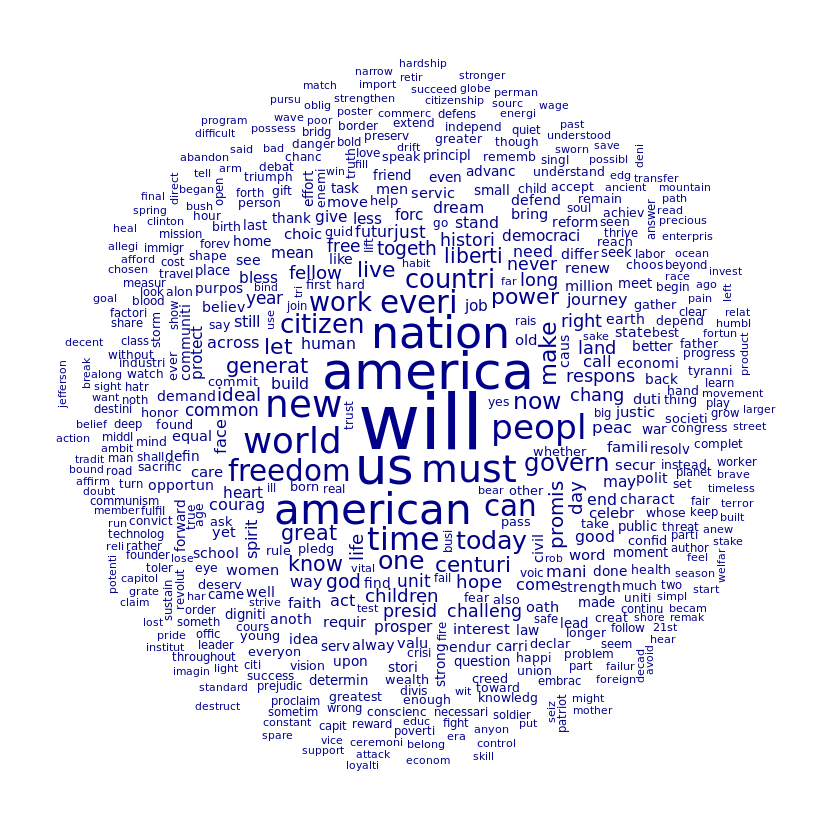

In [85]:
# generate a word cloud from the dfm-ised object
textplot_wordcloud(stop_stemmed, random_order = F)

In [87]:
# Group documents by document variable
# if we have several documents that differ based on some
# factors, say documents from different sources, or
# interview texts from different stakeholders, we can use them 
# to sort the documents and group them

# group irish budget documents by party
# Create a corpus, then
# dfm() this corpus based on party groups, remove stopwords,
# remove punctuations

budget_party <- corpus(data_corpus_irishbudget2010) %>%
                  dfm(groups = "party",
                     remove = stopwords("english"),
                     remove_punct = T)

# first 10 features of the budget_party
budget_party[, 1:10]

# sort this and reinspect
dfm_sort(budget_party)[, 1:10]

Document-feature matrix of: 5 documents, 10 features (14.0% sparse).
5 x 10 sparse Matrix of class "dfm"
       features
docs    presented supplementary budget house last april said work way period
  FF            1             7     44    14   12     1    1   20  22      6
  FG            1             1     71     3   11     5    5   10  20      3
  Green         0             0     26     2    3     0    1   14   3      2
  LAB           0             0     66    23    8     0    8    6  11      2
  SF            1             2     53     7   13     4    0    9  17      3

Document-feature matrix of: 5 documents, 10 features (0.0% sparse).
5 x 10 sparse Matrix of class "dfm"
       features
docs    will people budget government public minister tax economy pay jobs
  FF     212     23     44         47     65       11  60      37  41   41
  FG      93     78     71         61     47       62  11      20  29   17
  Green   59     15     26         19      4        4  11      16   4   15
  LAB     89     69     66         36     32       54  47      37  24   20
  SF     104     81     53         73     31       39  34      50  24   27

In [ ]:
# Group words contained in a set of documents by dictionary
# let's say we have a set of words that indicate traits
# we would like to measure from the text corpus
# say, we take a list of words that represents positive 
# sentiments in a corpus of movie reviews
# treat these different words as equivalent, i.e., each 
# word presents a positive trait, so sum up their counts
# should be present in a corpus of movie reviews
# First create a dictionary of word lists, 
# using dictionary(list())

# Take 1990+ inaugural speeches, create corpus
# create a dictionary of words that indicate terrorism
# and economy, call it econ_terr_dict
# dfm() to remove stopwords, punctuations
# and apply econ_terr_dict as dictionary = econ_terr_dict

recent_speech <- corpus_subset(inaugural, Year > 1990)

# Create the dictionary
econ_terr_d <- dictionary(list(
                terror = c("terrorism", "terrorists", "threat"),
                economy = c("jobs", "business", "growth", "work")
               ))
# dfm() to set the dictionary
econ_terr <- recent_speech %>%
               dfm(remove = stopwords("english"),
                  remove_punct = T,
                  dictionary = econ_terr_d)
# insepct econ_terr
econ_terr 
str(econ_terr)

In [91]:
download.file("https://provalisresearch.com/Download/WSD.zip", "wordstat.zip")

In [92]:
# find similarities between texts
# use textstat_simil()
# take recent_speech, the corpus of inaugural addresses 
# after 1990
# then dfm() to remove stopwords, punctuation, stem=T
# then create a matrix of similar documents, say 2009-Obama

pres_dfm <- recent_speech %>%
               dfm(remove = stopwords("english"),
                  stem = T,
                  remove_punct = T)
# find similarities
similarity_score <- pres_dfm %>%
  textstat_simil(c("2009-Obama"),
                margin = "documents",
                method = "cosine")


             2009-Obama
1993-Clinton  0.6288108
1997-Clinton  0.6954614
2001-Bush     0.6529447
2005-Bush     0.5766800
2009-Obama    1.0000000
2013-Obama    0.7144178
2017-Trump    0.5867729

In [93]:
# Develop topic models
# need topicmodels package
library(topicmodels)

In [94]:
# scale document position based on unsupervised scaling
# or wordfish model
irish_budget <- data_corpus_irishbudget2010 %>%
                 dfm(remove = stopwords("english"),
                    remove_punct = T)
textmodel_wordfish(irish_budget, dir = c(2,1))


Call:
textmodel_wordfish.dfm(x = irish_budget, dir = c(2, 1))

Dispersion: poisson; direction: 2 < 1; 14 documents; 5009 features.

In [96]:
# topicmodels
# first trim the document corpus to include
# minimum frequencies 4, and maximum document frequency = 10

# take irish_budget and trim it down

trimmed <- dfm_trim(irish_budget, 
                   min_termfreq = 4,
                   max_docfreq = 10)
trimmed[, 1:5]

In [102]:
# create topic models on the entire document

lda_fit <- LDA(convert(trimmed, to = "topicmodels"), k = 20)

term_mat <- get_terms(lda_fit, 5)
str(term_mat)

 chr [1:5, 1:20] "failed" "strategy" "seen" "adopted" "today" "kind" ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:20] "Topic 1" "Topic 2" "Topic 3" "Topic 4" ...


In [103]:
# Analysis of Moby Dick
# first extract text from mobydick

mobydick <- readtext("http://www.gutenberg.org/cache/epub/2701/pg2701.txt") %>%
              texts()
           

In [106]:
# display the first 100 characters
# load library stringi
library(stringi)
# load 1:100 characters using stri_sub()
stri_sub(mobydick, 1, 100)


[1] "The Project Gutenberg EBook of Moby Dick; or The Whale, by Herman Melville\n\nThis eBook is for the us"

In [107]:
## tidy text mining with R
# Convert text to tidy format
# store tokens, so one token per row

qtext <- texts(quantess)

In [110]:
text_df <- tibble(text = qtext)
str(text_df)
text_df

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	1 obs. of  1 variable:
 $ text: chr "                                 QuantessLondon\n    Quantess Summer Seminar Part II\nWelcome to Part II of our"| __truncated__


text
<chr>


In [112]:
# break the text into individual tokens 
# while in quanteda, we use tokens() or better yet
# dfm() and then pass arguments
# here, we use unnest_tokens()

# read text_df
# then, create new variable "word", based on "text" variable
tokenisedq <- text_df %>% 
  unnest_tokens(word, text)
# strips punctuation, same as remove_punct = T
# converts to lowercase, so tolower = T

tokenisedq

word
<chr>
quantesslondon
quantess
summer
seminar
part
ii
welcome
to
part


In [89]:
# let's tidy the work of Jane Austen
library(janeaustenr) # load janeaustenr package
library(stringr) # to manipulate strings

In [27]:
original_books <- austen_books() %>%
    group_by(book) %>%
    mutate(linenumber = row_number(),
          chapter = cumsum(str_detect(text, 
                                     regex("^chapter [\\divxlc]",
                                            ignore_case = T
                                          )))) %>%
    ungroup()

# original_books is the object where we store data
# austen_books() is the function that loads the books written in
# one row per line
# then we group by the books
# then create a new variable linenumber from the row number, and
# chapter which will evaluate a regular expression to detect anything
# that starts with Chapter/chapter etc, sum it up
# then we remove the grouping

str(original_books)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	73422 obs. of  4 variables:
 $ text      : chr  "SENSE AND SENSIBILITY" "" "by Jane Austen" "" ...
 $ book      : Factor w/ 6 levels "Sense & Sensibility",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ linenumber: int  1 2 3 4 5 6 7 8 9 10 ...
 $ chapter   : int  0 0 0 0 0 0 0 0 0 1 ...


In [28]:
# Now we take the original books 
# then tidy it up by tokenising using unnest_tokens()
# so that now we have one word per line or one token per row

tidy_books <- original_books %>%
    unnest_tokens(word, text)

tidy_books %>%
   head()

# remove stop words similar to remove = stopwords("engligh") with
# anti_join(stop_words) where stop_words = data set that comes with tidytext

tidy_books_sw <- tidy_books %>%
     anti_join(stop_words)

tidy_books_sw %>%
   head()
  

book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen


Joining, by = "word"


book,linenumber,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen
Sense & Sensibility,5,0,1811
Sense & Sensibility,10,1,chapter


In [127]:
# Find the 10 most common words using count
most_common_words <- tidy_books_sw %>%
  count(word) %>%
  arrange(desc(n)) 
most_common_words

word,n
<chr>,<int>
miss,1855
time,1337
fanny,862
dear,822
lady,817
sir,806
day,797
emma,787
sister,727


In [132]:
# Now you can visualise using a barplot
mcw <- most_common_words %>%
  mutate(prop = n * 10000 / sum(n)) 
mcw %>%
 head()

word,n,prop
<chr>,<int>,<dbl>
miss,1855,85.24464
time,1337,61.44047
fanny,862,39.61233
dear,822,37.77417
lady,817,37.54440
sir,806,37.03891


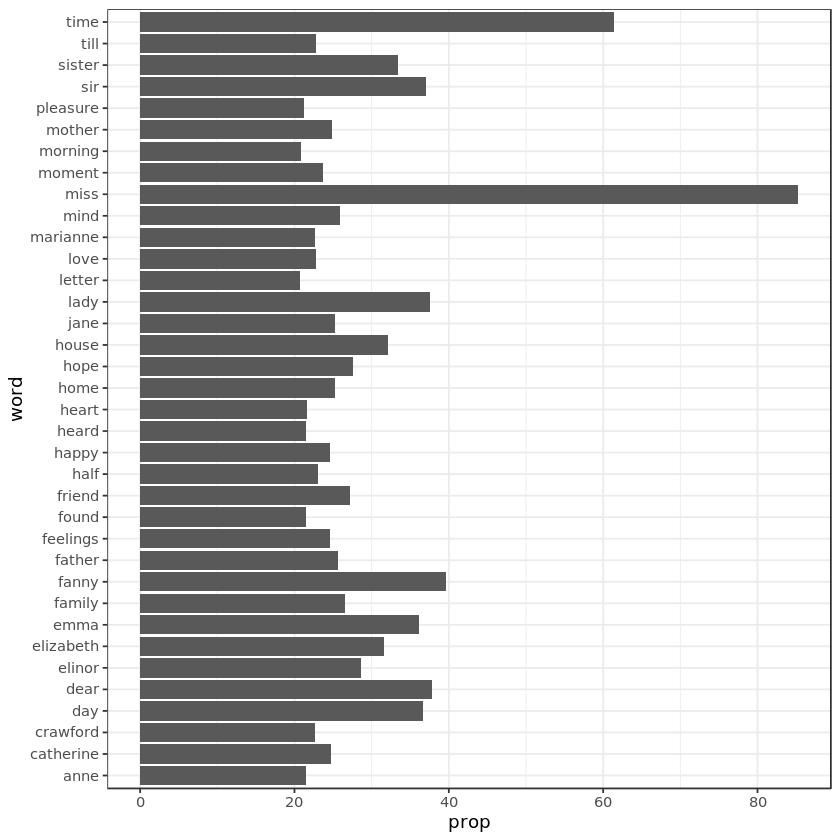

In [134]:
mcw %>%
  filter(prop > 20) %>%
  arrange(desc(prop)) %>%
  ggplot(aes(x = word, y = prop)) +
  geom_col() +
  coord_flip() +
  theme_bw()

In [88]:
## use gutenbergr 
# allows public domain works from project gutenberg
library(gutenbergr)

In [2]:
# install.packages("gutenbergr") 

Installing package into ‘/home/arinbasu/R/x86_64-conda_cos6-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
also installing the dependencies ‘triebeard’, ‘urltools’



In [4]:
# word frequencies
# access works using gutenberg_download()
# access time machine, war of the words, invisible man and island of dr moreau
hgwells <- gutenberg_download(c(35, 36, 5230, 159))

Determining mirror for Project Gutenberg from http://www.gutenberg.org/robot/harvest
Using mirror http://aleph.gutenberg.org


In [5]:
str(hgwells)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	20596 obs. of  2 variables:
 $ gutenberg_id: int  35 35 35 35 35 35 35 35 35 35 ...
 $ text        : chr  "The Time Machine, by H. G. Wells [1898]" "" "" "" ...


In [9]:
wells_corp <- corpus(hgwells)

In [10]:
summary(wells_corp)

Text,Types,Tokens,Sentences,gutenberg_id
<fct>,<int>,<int>,<int>,<int>
text1,12,13,3,35
text2,0,0,0,35
text3,0,0,0,35
text4,0,0,0,35
text5,0,0,0,35
text6,1,1,1,35
text7,0,0,0,35
text8,0,0,0,35
text9,15,15,1,35


In [11]:
tidy_wells <- hgwells %>%
   unnest_tokens(word, text) %>%
   anti_join(stop_words)
tidy_wells %>%
   head()

Joining, by = "word"


gutenberg_id,word
<int>,<chr>
35,time
35,machine
35,1898
35,time
35,traveller
35,convenient


In [15]:
wells_dfm <- dfm(wells_corp, 
                remove = stopwords("english"),
                remove_punct = T)

wells_dfm[1:5, 1:5]

Document-feature matrix of: 5 documents, 5 features (80.0% sparse).
5 x 5 sparse Matrix of class "dfm"
       features
docs    time machine h g wells
  text1    1       1 1 1     1
  text2    0       0 0 0     0
  text3    0       0 0 0     0
  text4    0       0 0 0     0
  text5    0       0 0 0     0

In [19]:
wells_txt <- texts(wells_corp)
str(wells_txt)
topfeatures(wells_dfm, 20)

 Named chr [1:20596] "The Time Machine, by H. G. Wells [1898]" "" "" "" "" ...
 - attr(*, "names")= chr [1:20596] "text1" "text2" "text3" "text4" ...


said     one     man    came    upon    time  little     saw    went     now 
   1070     608     557     547     472     450     434     404     390     355 
   like  people   still    back towards  seemed    face     way    door   first 
    312     302     284     284     284     271     262     257     255     254

In [20]:
tidy_wells %>%
   count(word, sort = T)

word,n
<chr>,<int>
time,454
people,302
door,260
heard,249
black,232
stood,229
white,222
hand,218
kemp,213


In [21]:
# get the works of bronte
bronte <- gutenberg_download(c(1260, 768, 969, 9182, 767))

In [22]:
str(bronte)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	78968 obs. of  2 variables:
 $ gutenberg_id: int  767 767 767 767 767 767 767 767 767 767 ...
 $ text        : chr  "_Facsimile of the Title-Page of the First Edition_, _which was issued_," "_together with_ '_Wuthering Heights_,' _in three volumes_, '_Wuthering" "Heights_' _forming Volumes_ 1 _and_ 2." "" ...


In [23]:
tidy_bronte <- bronte %>%
    unnest_tokens(word, text) %>%
    anti_join(stop_words)

str(tidy_bronte)

Joining, by = "word"


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	251036 obs. of  2 variables:
 $ gutenberg_id: int  767 767 767 767 767 767 767 767 767 767 ...
 $ word        : chr  "_facsimile" "title" "page" "edition_" ...


In [24]:
# find the most common words using count()
bronte_cw <- tidy_bronte %>%
     count(word, sort = T)
bronte_cw %>% head()

word,n
<chr>,<int>
time,1065
miss,855
day,827
hand,768
eyes,713
night,647


In [34]:
# bind the data frames together
word_freq <- bind_rows(mutate(tidy_bronte, author = "Bronte"),
                      mutate(tidy_wells, author = "Wells"),
                      mutate(tidy_books_sw, author = "Austen")) %>%
    mutate(word = str_extract(word, "[a-z']+")) %>%
    count(author, word) %>%
    group_by(author) %>%
    mutate(prop = n / sum(n)) %>%
    select(-n) %>%
    spread(author, prop) %>%
    gather(author, proportion, 'Bronte':'Wells')


word_freq %>% head()
    


    

word,Austen,author,proportion
<chr>,<dbl>,<chr>,<dbl>
a,9.190796e-06,Bronte,3.186794e-05
a'most,NA,Bronte,1.593397e-05
a'n't,4.595398e-06,Bronte,NA
aback,NA,Bronte,3.983492e-06
abaht,NA,Bronte,3.983492e-06
abandon,NA,Bronte,3.186794e-05


In [35]:
library(scales)


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor



Warning message:
“Removed 41357 rows containing missing values (geom_point).”Warning message:
“Removed 41357 rows containing missing values (geom_point).”Warning message:
“Removed 41359 rows containing missing values (geom_text).”

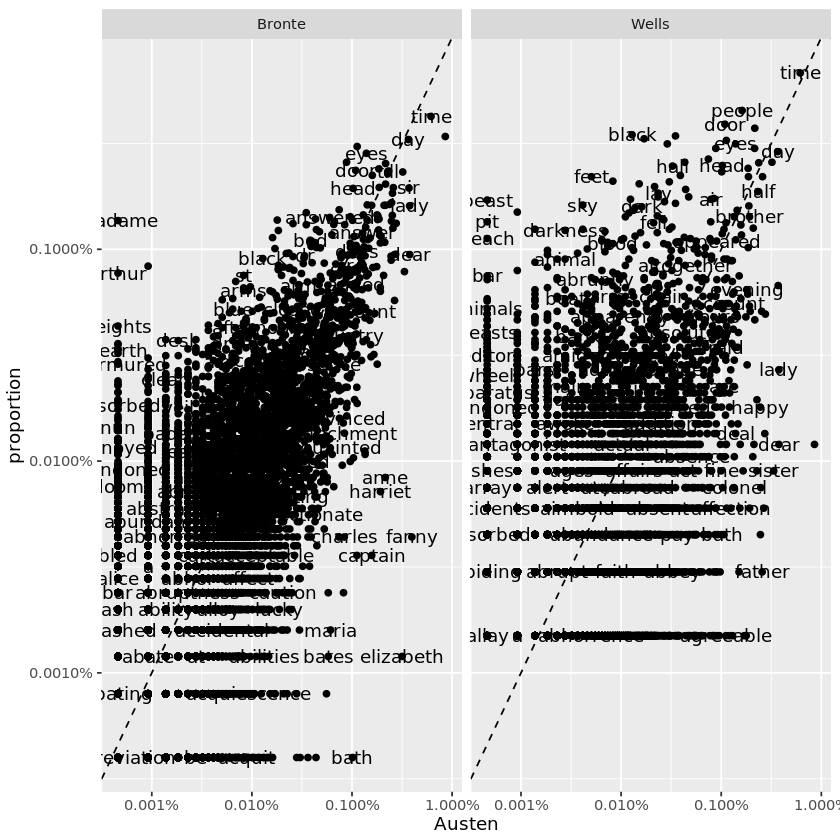

In [36]:
word_freq %>%
  ggplot(aes(x = Austen, y = proportion)) +
  geom_point() +
  geom_abline(lty = 2) +
  geom_jitter(alpha = 0.1) +
  geom_text(aes(label = word), check_overlap = T) +
  scale_x_log10(labels = percent_format()) +
  scale_y_log10(labels = percent_format()) +
  facet_wrap(~author)

In [39]:
## Test correlations between Austen and Bronte

word_freq %>% head()

word,Austen,author,proportion
<chr>,<dbl>,<chr>,<dbl>
a,9.190796e-06,Bronte,3.186794e-05
a'most,NA,Bronte,1.593397e-05
a'n't,4.595398e-06,Bronte,NA
aback,NA,Bronte,3.983492e-06
abaht,NA,Bronte,3.983492e-06
abandon,NA,Bronte,3.186794e-05


In [47]:
bronte_d <- word_freq %>%
    filter(author == "Bronte") 

cor.test(data = bronte_d,
        ~ proportion + Austen)
wells_d <- word_freq %>%
    filter(author == "Wells")

cor.test(data = wells_d,
        ~ proportion + Austen)


	Pearson's product-moment correlation

data:  proportion and Austen
t = 119.65, df = 10404, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7527869 0.7689642
sample estimates:
      cor 
0.7609938 



	Pearson's product-moment correlation

data:  proportion and Austen
t = 36.441, df = 6053, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4032800 0.4445987
sample estimates:
      cor 
0.4241601 


In [50]:
# sentiment analysis
# emotional content of text
# whole text sentiment = sum(individual word sentiment)
get_sentiments("afinn") 
# assigns -5 to +5 for sentiment
# -5 = negative, +5 = positive sentiment

get_sentiments("bing")

get_sentiments("nrc")

# unigram based

# inner join for sentiments dataset

ERROR: Error in loadNamespace(name): there is no package called ‘textdata’


In [54]:
get_sentiments("afinn")

Do you want to download:
 Name: AFINN-111 
 URL: http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010 
 License: Open Database License (ODbL) v1.0 
 Size: 78 KB (cleaned 59 KB) 
 Download mechanism: https 


ERROR: Error in menu(choices = c("Yes", "No"), title = title): menu() cannot be used non-interactively


In [56]:
library(textdata)
get_sentiments("afinn")

Do you want to download:
 Name: AFINN-111 
 URL: http://www2.imm.dtu.dk/pubdb/views/publication_details.php?id=6010 
 License: Open Database License (ODbL) v1.0 
 Size: 78 KB (cleaned 59 KB) 
 Download mechanism: https 


ERROR: Error in menu(choices = c("Yes", "No"), title = title): menu() cannot be used non-interactively


In [48]:
# what are the most common joy words in Emma?
# take the text of the novel
# convert the text to tidy format
tidy_austen <- austen_books() %>%
    group_by(book) %>%
    mutate(linenum = row_number(),
          chapter = cumsum(str_detect(text,
                                     regex("^chapter [\\divxlc]",
                                          ignore_case = T)))) %>%
    ungroup() %>%
    unnest_tokens(word, text)

tidy_austen %>% head()

book,linenum,chapter,word
<fct>,<int>,<int>,<chr>
Sense & Sensibility,1,0,sense
Sense & Sensibility,1,0,and
Sense & Sensibility,1,0,sensibility
Sense & Sensibility,3,0,by
Sense & Sensibility,3,0,jane
Sense & Sensibility,3,0,austen


In [58]:
download.file("https://www2.imm.dtu.dk/pubdb/views/edoc_download.php/6010/zip/imm6010.zip", 
             "nrc.zip")

In [87]:
library(quanteda)
library(readtext)
library(tidyverse)

In [84]:
afinn <- read_delim("AFINN/AFINN-111.txt", delim = "\t", col_names = c("word", "value"))
afinn


Parsed with column specification:
cols(
  word = col_character(),
  value = col_double()
)


word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2
abhor,-3
abhorred,-3
abhorrent,-3


In [85]:
# use the nrc lexicon to filter() joy words
joy_words <- afinn %>%
   filter(value >= 2) 

joy_words %>% head()

word,value
<chr>,<dbl>
abilities,2
ability,2
absolve,2
absolved,2
absolves,2
absolving,2


In [86]:
# inner_join with afinn positive values and tidy_austen
# filter Emma
tidy_austen %>%
   filter(book == "Emma") %>% # filtered Emma
   inner_join(joy_words) %>%
   count(word, sort = T)

Joining, by = "word"


word,n
<chr>,<int>
good,359
great,264
dear,241
like,200
better,173
hope,143
happy,125
love,117
pleasure,115


In [92]:
library(wordcloud)

Loading required package: RColorBrewer


Joining, by = "word"


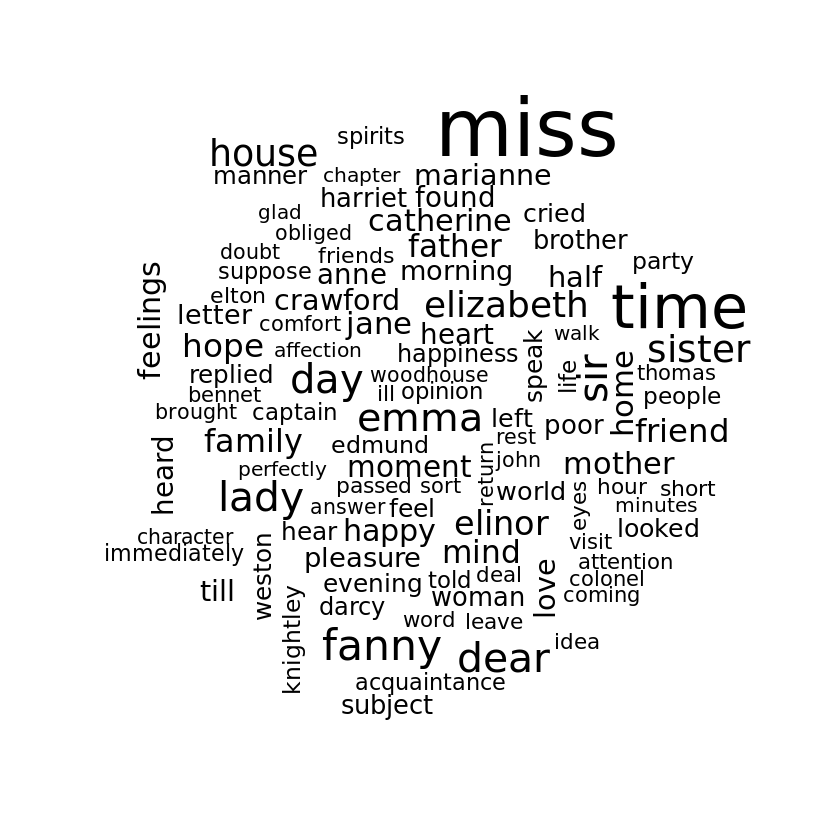

In [94]:
# creating wordcloud
tidy_austen %>%
   anti_join(stop_words) %>% # this will remove stop words
   count(word) %>%
   with(wordcloud(word, n, max.words = 100))

In [98]:
# analysis of word and document frequency
# how to quantify what a document is about
# term frequency measures importance of a word in a doc
# how frequently it occurs. It can be a word like 'the'
# inverse document frequency: decrease the wt for common
# used words and increase the weight for rare words
# combine with tf

# what are the most commonly used words in Jane Austen novels?

book_words <- austen_books() %>%
   unnest_tokens(word, text) %>% #create word from text
   count(book, word, sort = T) # words per book

book_words %>% head()

total_words <- book_words %>% 
    group_by(book) %>%
    summarise(total = sum(n))

total_words

book_words2 <- left_join(book_words, total_words)

book_words2

book,word,n
<fct>,<chr>,<int>
Mansfield Park,the,6206
Mansfield Park,to,5475
Mansfield Park,and,5438
Emma,to,5239
Emma,the,5201
Emma,and,4896


book,total
<fct>,<int>
Sense & Sensibility,119957
Pride & Prejudice,122204
Mansfield Park,160460
Emma,160996
Northanger Abbey,77780
Persuasion,83658


Joining, by = "book"


book,word,n,total
<fct>,<chr>,<int>,<int>
Mansfield Park,the,6206,160460
Mansfield Park,to,5475,160460
Mansfield Park,and,5438,160460
Emma,to,5239,160996
Emma,the,5201,160996
Emma,and,4896,160996
Mansfield Park,of,4778,160460
Pride & Prejudice,the,4331,122204
Emma,of,4291,160996


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 896 rows containing non-finite values (stat_bin).”Warning message:
“Removed 6 rows containing missing values (geom_bar).”

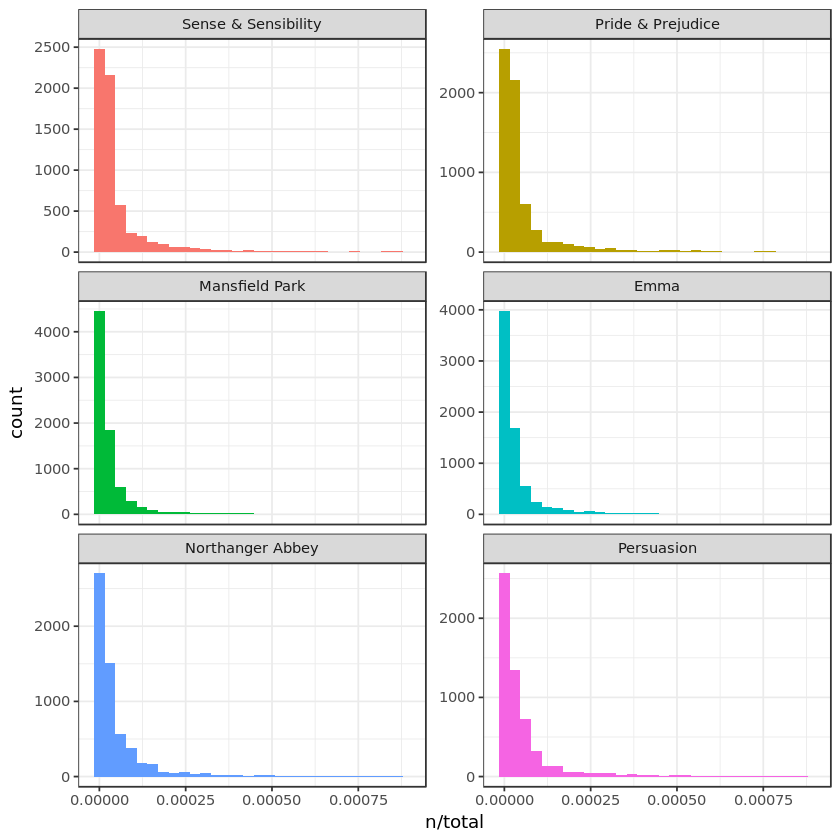

In [100]:
book_words2 %>%
   ggplot(aes(x = n / total, fill = book)) +
   geom_histogram(show.legend = F) + 
  xlim(NA, 0.0009) +
  facet_wrap(~book, ncol = 2, scales = "free_y") +
  theme_bw()

In [101]:
# create a new data of frequency by rank
freq_rank <- book_words2 %>%
    group_by(book) %>%
    mutate(rank = row_number(),
          termfreq = n / total)

freq_rank %>% head()

book,word,n,total,rank,termfreq
<fct>,<chr>,<int>,<int>,<int>,<dbl>
Mansfield Park,the,6206,160460,1,0.03867631
Mansfield Park,to,5475,160460,2,0.03412065
Mansfield Park,and,5438,160460,3,0.03389007
Emma,to,5239,160996,1,0.03254118
Emma,the,5201,160996,2,0.03230515
Emma,and,4896,160996,3,0.03041069


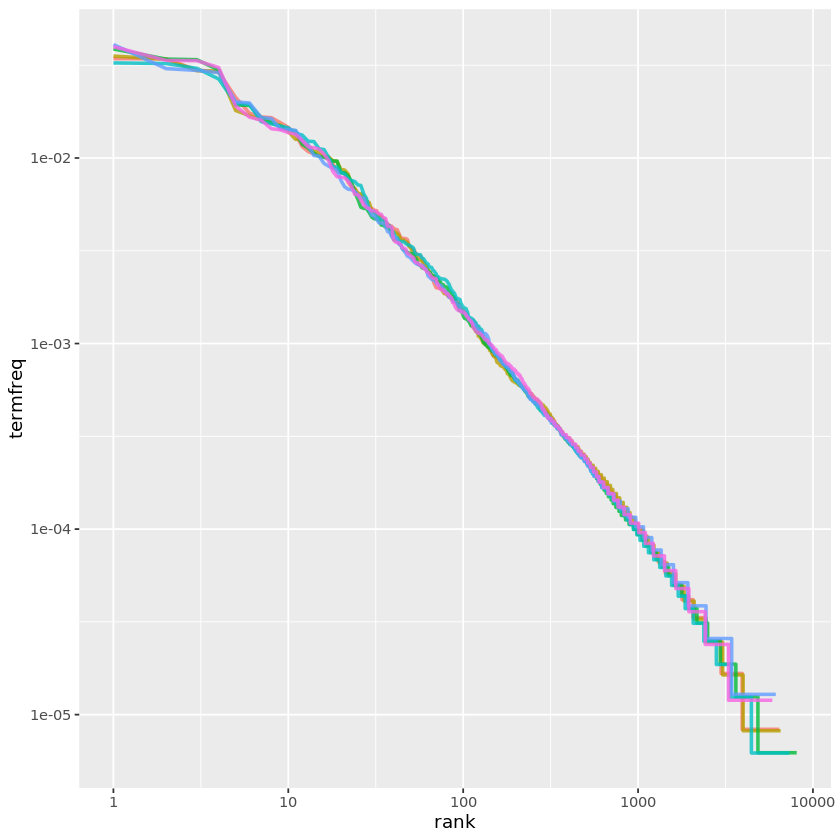

In [102]:
freq_rank %>%
   ggplot(aes(x = rank, y = termfreq, colour = book)) +
   geom_line(size = 1, alpha = 0.8, show.legend = F) +
   scale_x_log10() +
   scale_y_log10()

In [103]:
# create a rank subset where rank is < 500 and > 10

rank_subset <- freq_rank %>%
   filter(rank < 500, 
         rank > 10)

lm(log10(termfreq) ~ log10(rank), data = rank_subset)


Call:
lm(formula = log10(termfreq) ~ log10(rank), data = rank_subset)

Coefficients:
(Intercept)  log10(rank)  
    -0.6226      -1.1125  


In [104]:
# n-grams and correlations
# which words follow which others 
# quanteda provides kwic()
# use token = "ngrams", n = 2 (for bigrams,)

austen_bigrams <- austen_books() %>%
   unnest_tokens(bigram, text, token = "ngrams", n = 2)

# now we have used bigram instead of word

austen_bigrams %>% head()


book,bigram
<fct>,<chr>
Sense & Sensibility,sense and
Sense & Sensibility,and sensibility
Sense & Sensibility,sensibility by
Sense & Sensibility,by jane
Sense & Sensibility,jane austen
Sense & Sensibility,austen 1811


In [105]:
# most common bigrams

austen_bigrams %>%
  count(bigram, sort = T)

bigram,n
<chr>,<int>
of the,3017
to be,2787
in the,2368
it was,1781
i am,1545
she had,1472
of her,1445
to the,1387
she was,1377


In [106]:
split_bigram <- austen_bigrams %>%
    separate(bigram, c("w1", "w2"), sep = " ")

split_bigram %>% head()

book,w1,w2
<fct>,<chr>,<chr>
Sense & Sensibility,sense,and
Sense & Sensibility,and,sensibility
Sense & Sensibility,sensibility,by
Sense & Sensibility,by,jane
Sense & Sensibility,jane,austen
Sense & Sensibility,austen,1811


In [107]:
# then filter by removing words in w1 and w2 that are 
# stop words

filtered_bigram <- split_bigram %>%
     filter(!w1 %in% stop_words$word) %>%
     filter(!w2 %in% stop_words$word)

filtered_bigram %>% head()

book,w1,w2
<fct>,<chr>,<chr>
Sense & Sensibility,jane,austen
Sense & Sensibility,austen,1811
Sense & Sensibility,1811,chapter
Sense & Sensibility,chapter,1
Sense & Sensibility,norland,park
Sense & Sensibility,surrounding,acquaintance


In [108]:
# now count
bigram_counts <- filtered_bigram %>%
   count(w1, w2, sort = T)

bigram_counts %>% head()

w1,w2,n
<chr>,<chr>,<int>
sir,thomas,287
miss,crawford,215
captain,wentworth,170
miss,woodhouse,162
frank,churchill,132
lady,russell,118


In [111]:
# now unite them
common_bigrams <- filtered_bigram %>%
   unite(bigram, w1, w2, sep = " ")

common_bigrams

book,bigram
<fct>,<chr>
Sense & Sensibility,jane austen
Sense & Sensibility,austen 1811
Sense & Sensibility,1811 chapter
Sense & Sensibility,chapter 1
Sense & Sensibility,norland park
Sense & Sensibility,surrounding acquaintance
Sense & Sensibility,late owner
Sense & Sensibility,advanced age
Sense & Sensibility,constant companion


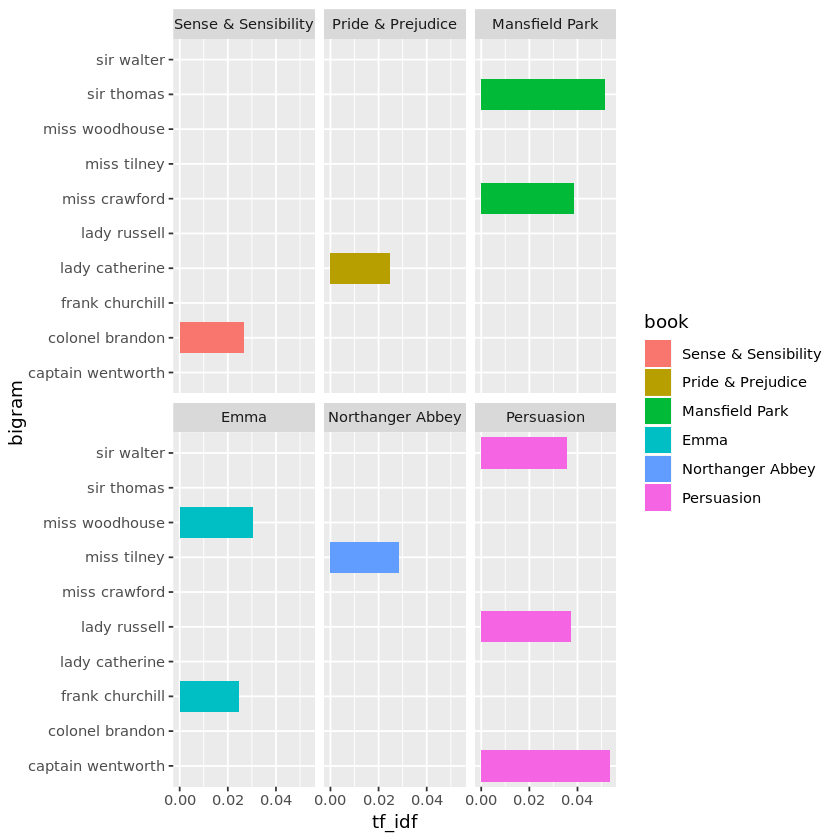

In [129]:
bigram_tfidf <- common_bigrams %>%
    count(book, bigram) %>%
    bind_tf_idf(bigram, book, n) %>%
    arrange(desc(tf_idf))

bigram_tfidf %>%
     head(10) %>%
   ggplot(aes(x = bigram, y = tf_idf, fill = book)) +
   geom_col() +
   coord_flip() +
   facet_wrap(~book)

In [125]:
# topic modelling

library(topicmodels)

In [128]:
# document = mix of topics
# topic = mix of words
# LDA estimates documents and topics at the same time
# load the associated press data set (2246 news articles)

data(AssociatedPress)
str(AssociatedPress)

List of 6
 $ i       : int [1:302031] 1 1 1 1 1 1 1 1 1 1 ...
 $ j       : int [1:302031] 116 153 218 272 299 302 447 455 548 597 ...
 $ v       : num [1:302031] 1 2 1 1 1 1 2 1 1 1 ...
 $ nrow    : int 2246
 $ ncol    : int 10473
 $ dimnames:List of 2
  ..$ Docs : NULL
  ..$ Terms: chr [1:10473] "aaron" "abandon" "abandoned" "abandoning" ...
 - attr(*, "class")= chr [1:2] "DocumentTermMatrix" "simple_triplet_matrix"
 - attr(*, "weighting")= chr [1:2] "term frequency" "tf"
